torch version:  1.13.1+cu116


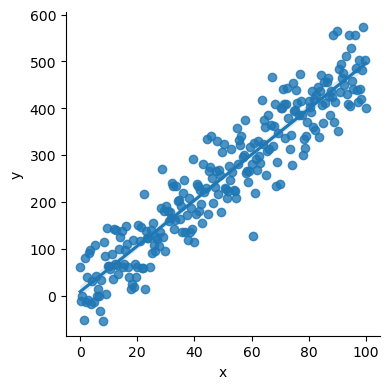

In [30]:
#导入相关库
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print("torch version: ", torch.__version__)  #torch version:  1.1.0


#随机生成一些点，并做成DataFrame
x = np.linspace(0, 100, 256)
noise = np.random.randn(256) * 50
y = x * 5 + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

#可视化
sns.lmplot(x='x', y='y', data=df, height=4)


In [31]:
#准备数据
train_x = x.reshape(-1, 1).astype('float32')
train_y = y.reshape(-1, 1).astype('float32')
train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)


#准备模型
model = nn.Linear(1, 1)


#定义训练参数
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 3000

#开始训练
for i in range(1, epochs+1):
    optimizer.zero_grad()
    out = model(train_x)
    loss = loss_fn(out, train_y)
    loss.backward()
    optimizer.step()
    if(i % 300 == 0):
        print('epoch {}  loss {:.4f}'.format(i, loss.item())) 


epoch 300  loss nan
epoch 600  loss nan
epoch 900  loss nan
epoch 1200  loss nan
epoch 1500  loss nan
epoch 1800  loss nan
epoch 2100  loss nan
epoch 2400  loss nan
epoch 2700  loss nan
epoch 3000  loss nan


nan nan


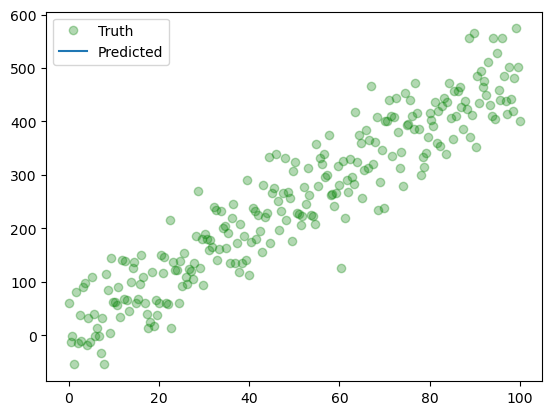

In [32]:
#获取参数值
w, b = model.parameters()  #parameters()返回的是一个迭代器指向的对象
print(w.item(), b.item())  

#结果可视化
#model返回的是总tensor，包含grad_fn，用data提取出的tensor是纯tensor
pred = model.forward(train_x).data.numpy().squeeze() 
plt.plot(x, y, 'go', label='Truth', alpha=0.3)
plt.plot(x, pred, label='Predicted')
plt.legend()
plt.show()
